# Illustrate problem with Fourier series

Gibbs phenomenon (first discovered by Wilbraham!).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from matplotlib import cm
import sympy as sym

#### Look at square wave

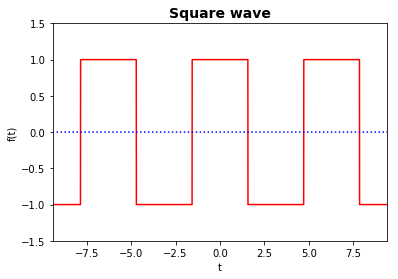

In [2]:
# define the function Hats
def Hats(t, T):
    '''
    Top hat function centered on zero with period T
    '''
    arg = t - ((t - T/2)//T)*T - T
    H = -1.0*np.ones(len(t))
    logicalPos = abs(arg) < T/4
    H[logicalPos] = 1.0
    return H
#
nArr = 10000
T = 2*np.pi
tBot = -1.5*T
tTop = 1.5*T
tArr = np.linspace(tBot, tTop, nArr)
YHat = np.zeros(nArr)
YHat= Hats(tArr, T)
plt.plot(tArr, YHat, linestyle = '-', color = 'r')
plt.plot(tArr, 0.0*np.ones(nArr), linestyle = ':', color = 'b')
ax = plt.gca()
ax.set_title("Square wave", size = 14, weight = "bold")
ax.set_xlabel("t")
ax.set_ylabel("f(t)")
plt.axis([tBot, tTop, -1.5, 1.5])
#plt.savefig("SquareWaveGap.png")
plt.show()

#### Define and plot Fourier series for square wave

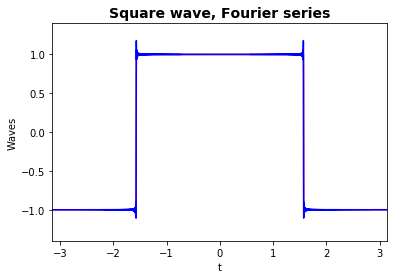

In [6]:
Debug = False
def fourierSum(nC, t):
    if not hasattr(fourierSum, "coeffs") or fourierSum.coeffs < nC or Debug:
        fourierSum.coeffs = nC
        fourierSum.nArr = np.linspace(0, nC, nC + 1).astype(int)
        fourierSum.aArr = np.zeros(nC + 1)
        fourierSum.aArr[1:nC + 1] = 4/(fourierSum.nArr[1:nC + 1]*np.pi)*np.sin(fourierSum.nArr[1:nC + 1]*np.pi/2)
        fourierSum.aArr[0] = 0.0
        fourierSum.bArr = np.zeros(nC + 1)
        #
    #
    fArr = fourierSum.aArr[0]
    for n in range(1, nC + 1):
        fArr = fArr + fourierSum.aArr[n]*np.cos(n*t) + fourierSum.bArr[n]*np.sin(n*t)
    return fArr
#
plt.plot(tArr, YHat, linestyle = '-', color = 'r')
plt.plot(tArr, fourierSum(1000, tArr), linestyle = '-', color = 'b')
ax = plt.gca()
ax.set_title("Square wave, Fourier series", size = 14, weight = "bold")
ax.set_xlabel("t")
ax.set_ylabel("Waves")
plt.axis([-np.pi, np.pi, -1.4, 1.4])
#plt.savefig("SquareWaveManyTerms.png")
plt.show()